# Import Libraries

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

# Plot the data

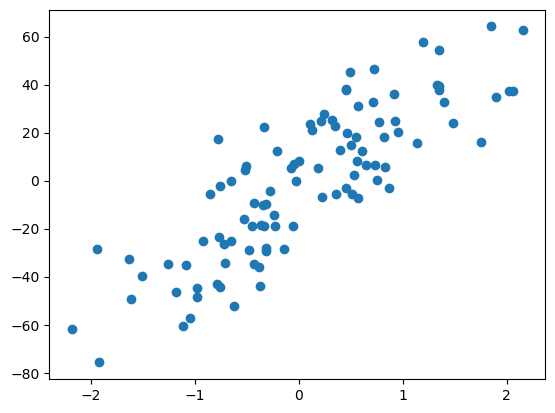

In [3]:
plt.scatter(X,y)

# m and b calculation using linear regression

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


# m and b calculation using ridge regression

In [6]:
from sklearn.linear_model import Ridge

In [7]:
# take alpha=10

rr = Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[24.9546267]
-2.1269130035235726


In [8]:
# take alpha=100

rr1 = Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

[12.93442104]
-1.4248441496033308


# Regression line plot with alpha=0,10 and 100

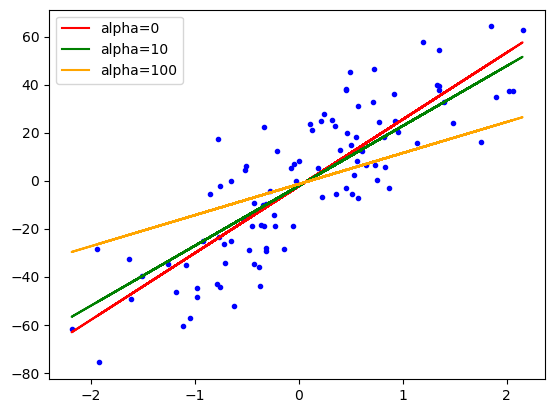

In [9]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='alpha=0')
plt.plot(X,rr.predict(X),color='green',label='alpha=10')
plt.plot(X,rr1.predict(X),color='orange',label='alpha=100')
plt.legend()

# m and b calculation using Mera Ridge Regression (Own class)

In [10]:
def linear_regression(X,y,alpha=1):
    x_mean = X.mean()
    y_mean = y.mean()
    
    num = 0
    den = 0
    
    for i in range(X.shape[0]):
        num = num + (y[i] - y_mean) * (X[i] - x_mean)
        den = den + (X[i] - x_mean) * (X[i] - x_mean)
        
    m = num/(den + alpha)
    b = y_mean - m*x_mean
        
    return m,b

In [11]:
class MeraRidge:
    
    def __init__(self,alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            num = num + (y_train[i] - y_train.mean())*(X_train[i] - X_train.mean())
            den = den + (X_train[i] - X_train.mean())*(X_train[i] - X_train.mean())
        
        self.m = num/(den + self.alpha)
        self.b = y_train.mean() - (self.m*X_train.mean())
        print(self.m,self.b)
    
    def predict(X_test):
        pass

In [12]:
reg = MeraRidge(alpha=100)

In [13]:
reg.fit(X,y)

[12.93442104] [-1.42484415]
